In [1]:
%pylab inline
import numpy as np
import math

Populating the interactive namespace from numpy and matplotlib


Condiciones iniciales del problema.

In [2]:
q=-1.602176565E-19
v_0=3.0E5
theta_0=0
B=-10**(-4)
m=9.1093829E-31
N=1000

Cálculo del tiempo que tarda la partícula en volver a cruzar el eje $x$ teóricamente t definición del intervalo de tiempo a observar.

In [3]:
def tiempo(q,B,theta_0, m,N):
    t_max=(m/(q*B))*(2*theta_0+math.pi)
    dt=t_max/N
    t=np.arange(0,t_max+dt,dt)
    return t, t_max
time,t_max=tiempo(q,B,theta_0, m,N)
print("El tiempo total del recorrido teóricamente hasta llegar al detector es {}.".format(t_max))

El tiempo total del recorrido teóricamente hasta llegar al detector es 1.7861932962036851e-07.


Ecuaciones de posición teóricas respecto al tiempo $t$ para $\theta_0$ arbitrario y na velocidad $v_0$ de entrada.

In [4]:
def posicion(q,B,v_0,theta_0,m,t):
    omega=q*B/m
    x=-v_0*np.cos(theta_0-omega*t)/omega+v_0*np.cos(theta_0)/omega
    y=-v_0*np.sin(theta_0-omega*t)/omega+v_0*np.sin(theta_0)/omega
    return x,y

Gráfica del recorrido circular de una partícula de carga $q$ que incide en el eje $x$ con rapidez $v_0$ y ángulo de incidencia $\theta_0=0,$debido a un campo $\mathbf{B}$ perpendicular.

Text(0, 0.5, 'Posición en y')

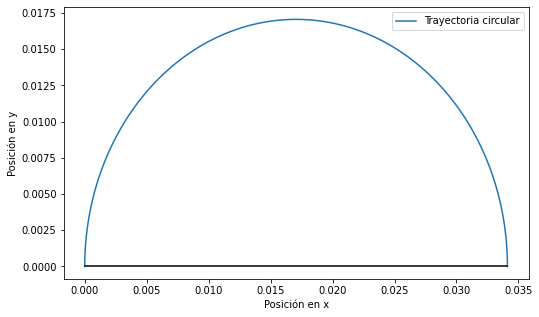

In [6]:
plt.figure(figsize=(50/6,5))
xTeo,yTeo=posicion(q,B,v_0,theta_0,m,time)
plt.plot(xTeo,yTeo, label="Trayectoria circular")
plt.plot(xTeo,np.zeros(len(xTeo)), c="black")
plt.legend()
plt.xlabel("Posición en x (m)")
plt.ylabel("Posición en y (m)")

Cálculo de la posición final de la partícula al llegar al detector, es decir el punto en el que la trayectoria cruza el eje $x$ nuevamente.

In [7]:
x_max, y_max=posicion(q,B,v_0,theta_0,m,t_max)
print("Teóricamente a partícula alcanza el detector cuando este se encuentra en x={}m y y={}m.".format(x_max,y_max))

Teóricamente a partícula alcanza el detector cuando este se encuentra en x=0.0341137790890107m y y=9.663647118728019e-18m.


Cálculo del momento inicial $p_0=mv_0$, final $p_f=\frac{1}{2}qBx$ y la diferencia de momento que comprueba la conservación del momento lineal.

In [8]:
p_0=m*v_0
p_f=0.5*q*B*x_max
dp=np.abs(p_f-p_0)
print("El momento inicial de la partícula es {} kg m/s, el momento final es {} kg m/s y la diferencia de momento es {} kg m/s.".format(p_0,p_f,dp))

El momento inicial de la partícula es 2.73281487e-25 kg m/s, el momento final es 2.73281487e-25 kg m/s y la diferencia de momento es 0.0 kg m/s.


Definición de la función de trayectoria de la partícula que incide con rapidez $v_0$ y ángulo $\theta_0$ a una región de campo magnético erpendicular $\mathbf{B}$; siguiendo el paso a paso de Feynmann.

In [9]:
def pasoApaso(q,B,v_0,theta_0,m):
    N=10000
    t=0.0
    omega=q*B/m
    dt=1/(omega*N)
    x=[0]
    y=[0]
    v_x=-v_0*np.sin(theta_0)
    v_y=v_0*np.cos(theta_0)
    while y[-1]>=0:
        a_x=omega*v_y
        a_y=-omega*v_x
        x_new=x[-1]+v_x*dt
        y_new=y[-1]+v_y*dt
        x.append(x_new)
        y.append(y_new)
        v_x=v_x+a_x*dt
        v_y=v_y+a_y*dt
        t=t+dt
    x=np.array(x)
    y=np.array(y)
    return x,y,t

Gráfica de la trayectoria circular por medio del Método de Feynmann de una partícula de carga $q$ que incide en el eje $x$ con rapidez $v_0$ y ángulo de incidencia $\theta_0=0,$debido a un campo $\mathbf{B}$ perpendicular.

Text(0, 0.5, 'Posición en y')

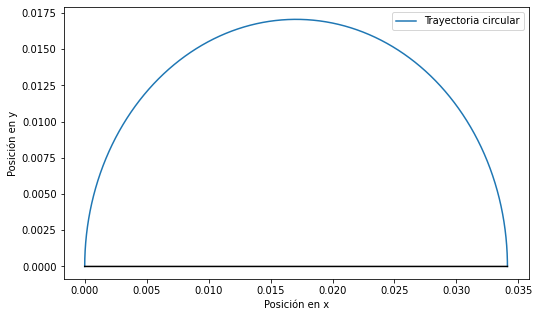

In [11]:
plt.figure(figsize=(50/6,5))
xF,yF,t_maxF=pasoApaso(q,B,v_0,theta_0,m)
plt.plot(xF,yF, label="Trayectoria circular")
plt.plot(xF,np.zeros(len(xF)), c="black")
plt.legend()
plt.xlabel("Posición en x (m)")
plt.ylabel("Posición en y (m)")

Cálculo numérico de la posición final de la partícula al llegar al detector.

In [12]:
xF_max=xF[-1]
yF_max=yF[-1]
print("Mediante el Método de Feynmann la partícula alcanza el detector cuando este se encuentra en x={}m y y={}m.".format(xF_max,yF_max))

Mediante el método de Feynmann la partícula alcanza el detector cuando este se encuentra en x=0.03411645859519082m y y=-1.2514794460159725e-07m.


Cálculo del momento inicial $p_0=mv_0$, final $p_f=\frac{1}{2}qBx$ y la diferencia de momento que comprueba la conservación del momento lineal.

In [21]:
pF_0=m*v_0
pF_f=0.5*q*B*xF_max
dpF=np.abs(pF_f-pF_0)
print("El momento inicial de la partícula es {} kg m/s, el momento final es {} kg m/s y la diferencia de momento es {} kg m/s.".format(pF_0,pF_f,dpF))

El momento inicial de la partícula es 2.73281487e-25 kg m/s, el momento final es 2.733029522100378e-25 kg m/s y la diferencia de momento es 2.1465210037821538e-29 kg m/s.


Definición de cambio en la velocidad y la función de trayectoria de la partícula que incide con rapidez $v_0$ y ángulo $\theta_0$ a una región de campo magnético erpendicular $\mathbf{B}$; siguiendo el paso a paso del Método de Runge Kutta de cuarto orden.

In [18]:
def delta(omega,v_x,v_y,dt):
    delta11=dt*omega*v_y
    delta12=dt*omega*(v_y+delta11/2)
    delta13=dt*omega*(v_y+delta12/2)
    delta14=dt*omega*(v_y+delta13)
    delta1=(delta11+2*delta12+2*delta13+delta14)/6
    delta21=-dt*omega*v_x
    delta22=-dt*omega*(v_x+delta21/2)
    delta23=-dt*omega*(v_x+delta22/2)
    delta24=-dt*omega*(v_x+delta23)
    delta2=(delta21+2*delta22+2*delta23+delta24)/6
    return delta1, delta2

def rungePaso(q,B,v_0,theta_0,m,N):
    t=0.0
    omega=q*B/m
    dt=1/(omega*N)
    x=[0]
    y=[0]
    v_x=-v_0*np.sin(theta_0)
    v_y=v_0*np.cos(theta_0)
    while y[-1]>=0:
        x_new=x[-1]+v_x*dt
        y_new=y[-1]+v_y*dt
        x.append(x_new)
        y.append(y_new)
        v_x=v_x+delta(omega,v_x,v_y,dt)[0]
        v_y=v_y+delta(omega,v_x,v_y,dt)[1]
        t=t+dt
    x=np.array(x)
    y=np.array(y)
    return x,y,t

Gráfica de la trayectoria circular por medio del Método de Runge Kutta 4 de una partícula de carga $q$ que incide en el eje $x$ con rapidez $v_0$ y ángulo de incidencia $\theta_0=0,$debido a un campo $\mathbf{B}$ perpendicular.

Text(0, 0.5, 'Posición en y (m)')

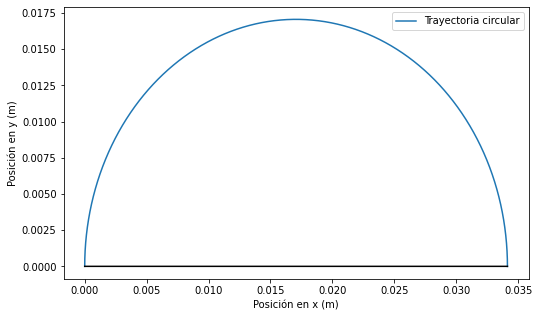

In [26]:
plt.figure(figsize=(50/6,5))
xR,yR,t_maxR=rungePaso(q,B,v_0,theta_0,m,N)
plt.plot(xR,yR, label="Trayectoria circular")
plt.plot(xR,np.zeros(len(xR)), c="black")
plt.legend()
plt.xlabel("Posición en x (m)")
plt.ylabel("Posición en y (m)")

Cálculo numérico de la posición final de la partícula al llegar al detector.

In [27]:
xR_max=xR[-1]
yR_max=yR[-1]
print("Mediante el Método de Runge Kutta 4 la partícula alcanza el detector cuando este se encuentra en x={}m y y={}m.".format(xR_max,yR_max))

Mediante el Método de Runge Kutta 4 la partícula alcanza el detector cuando este se encuentra en x=0.03413084088171104m y y=-6.952529174398728e-06m.


Cálculo del momento inicial $p_0=mv_0$, final $p_f=\frac{1}{2}qBx$ y la diferencia de momento que comprueba la conservación del momento lineal.

In [28]:
pR_0=m*v_0
pR_f=0.5*q*B*xR_max
dpR=np.abs(pR_f-pR_0)
print("El momento inicial de la partícula es {} kg m/s, el momento final es {} kg m/s y la diferencia de momento es {} kg m/s.".format(pR_0,pR_f,dpR))

El momento inicial de la partícula es 2.73281487e-25 kg m/s, el momento final es 2.7341816702210685e-25 kg m/s y la diferencia de momento es 1.3668002210685885e-28 kg m/s.


Comparación gráfica de los métodos numéricos para $\theta_0=0$.

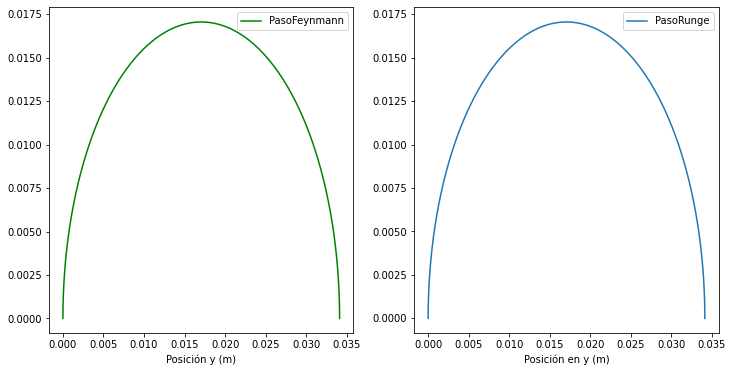

In [29]:
plt.figure(figsize=(12,6))
plt.title("Recorridos de partículas con carga {}C, masa {}kg, velocidad {}m/s, ángulo de entrada {}rad, debidas a un campo perpendicular B={}T.".format(q,m,v_0,theta_0,B))
plt.subplot(1,2,1)
plt.plot(xF,yF, label="PasoFeynmann", c="green")
plt.legend()
plt.xlabel("Posición x (m)")
plt.xlabel("Posición y (m)")
plt.subplot(1,2,2)
plt.plot(xR,yR, label="PasoRunge")
plt.legend()
plt.xlabel("Posición en x (m)")
plt.xlabel("Posición en y (m)")
plt.savefig("recorridos.jpg")